In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
import pandas as pd
from PIL import Image
import argparse
import os
import copy

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split


LABELS_Severity = {35: 0,
                   43: 0,
                   47: 1,
                   53: 1,
                   61: 2,
                   65: 2,
                   71: 2,
                   85: 2}


mean = (.1706)
std = (.2112)
normalize = transforms.Normalize(mean=mean, std=std)

transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    #transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    normalize,
])

transform1 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    normalize,
])
    
class OCTDataset(Dataset):
    def __init__(self, args, subset='train', transform=None,):
        if subset == 'train':
            self.annot = pd.read_csv('df_prime_train.csv')
        elif subset == 'test':
            self.annot = pd.read_csv('df_prime_test.csv')
            
        self.annot['Severity_Label'] = [LABELS_Severity[drss] for drss in copy.deepcopy(self.annot['DRSS'].values)] 
        # print(self.annot)
        self.root = os.path.expanduser('/storage/home/hpaceice1/shared-classes/materials/ece8803fml')
        self.transform = transform
        # self.subset = subset
        self.nb_classes=len(np.unique(list(LABELS_Severity.values())))
        self.path_list = self.annot['File_Path'].values
        self._labels = self.annot['Severity_Label'].values
        assert len(self.path_list) == len(self._labels)
        # idx_each_class = [[] for i in range(self.nb_classes)]
        print("Sucess")

    def __getitem__(self, index):
        img, target = Image.open(self.root+self.path_list[index]).convert("L"), self._labels[index]

        if self.transform is not None:
            img = self.transform(img)

        return img, target

    def __len__(self):
        return len(self._labels)         

def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--annot_train_prime', type = str, default = 'df_prime_train.csv')
    parser.add_argument('--annot_test_prime', type = str, default = 'df_prime_test.csv')
    parser.add_argument('--data_root', type = str, default = '')
    return parser.parse_args()

if __name__ == '__main__':
    args = 0
    trainset = OCTDataset(args, 'train', transform=transform)
    trainset, valset = torch.utils.data.random_split(trainset, [8/9, 1/9])
    trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
    valloader = DataLoader(valset, batch_size=64, shuffle=True)
    testset = OCTDataset(args, 'test', transform=transform)
    testloader = DataLoader(testset, batch_size=64, shuffle=True)
    


    
    #trainset1 = OCTDataset(args, 'train', transform=transform1)
    #trainloader1 = DataLoader(trainset1, batch_size=64, shuffle=True)
    #testset1 = OCTDataset(args, 'test', transform=transform1)
    #testloader1 = DataLoader(testset1, batch_size=64, shuffle=True)
    #gmm = GaussianMixture(n_components=3)
    #gmm = GaussianMixture(n_components=3)
    #print(trainset._labels)
    #for sample in trainset:
    #    for im in sample:
            #print(im.shape)
    #        features = im.reshape(-1,1)
            #print(features.shape)
            #print(features)
            #gmm.fit(features)
    print(len(trainset), len(testset))

Sucess
Sucess
21558 7987


In [2]:
import os
os.environ['TORCH_HOME'] = "/storage/home/hpaceice1/ksu48/FML"

from torchvision import models

models.resnet18(pretrained=True)

/storage/home/hpaceice1/ksu48/.conda/envs/ece8893/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/storage/home/hpaceice1/ksu48/.conda/envs/ece8893/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
import torch
from torchvision.models import resnet18

In [8]:
import torch.nn as nn

# define learning rate and number of training epochs
lr = 0.001
epochs = 50

# intialize model and change last layer
model = resnet18(weights = None) # randomly intialize the model

In [9]:
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3,bias=False)
model.fc = nn.Linear(512,3)
model= nn.DataParallel(model)
model = model.to('cuda')

In [25]:
#Weighted loss function
from sklearn.utils import class_weight
loss_weight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(trainset.dataset._labels), y=trainset.dataset._labels)
loss_weight = torch.tensor(loss_weight, dtype = torch.float).to('cuda')

In [26]:
# define loss function
loss = nn.CrossEntropyLoss()

# set up optimizer with the specified learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
pred = torch.tensor(np.zeros(len(trainset)))
pred.to('cuda')

train_loss = np.zeros(50)
train_acc = np.zeros(50)
val_loss = np.zeros(50)
val_acc = np.zeros(50)

for epoch in range(epochs):
    total_loss = 0
    total_acc = 0
    val_total_loss = 0
    val_total_acc = 0
    for i, (x, y) in enumerate(trainloader):
    
        model.train()
        optimizer.zero_grad()

        # extract input, obtain model output, loss, and backpropagate
        input = x.to('cuda')
        #label = nn.functional.one_hot(torch.tensor(y)).to('cuda')
        label = y.to('cuda')
        out = model(input)
        #if epoch == 99:
                #pred[64*i:(64*i+out.shape[0])] = torch.argmax(out,dim = 1)
        loss_train = loss(out, label)
        total_loss += loss_train.item()  * out.shape[0]
        total_acc += sum(torch.argmax(out,dim = 1)==label)
        loss_train.backward()
        optimizer.step()
    total_loss = total_loss/len(trainset)
    train_loss[epoch] = total_loss
    total_acc = total_acc/len(trainset)
    train_acc[epoch] = total_acc
    
    model.eval()
    for i, (x, y) in enumerate(valloader):
        optimizer.zero_grad()
        input = x.to('cuda')
        label = y.to('cuda')
        out = model(input)
        loss_val = loss(out, label)
        val_total_loss += loss_val.item()  * out.shape[0]
        val_total_acc += sum(torch.argmax(out,dim = 1)==label)
    val_total_loss = val_total_loss/len(valset)
    val_loss[epoch] = val_total_loss
    val_total_acc = val_total_acc/len(valset)
    val_acc[epoch] = val_total_acc

    print('Epoch: {} | Loss:{:0.6f}'.format(epoch, loss_train.item()))

Epoch: 0 | Loss:0.678950
Epoch: 1 | Loss:0.554260
Epoch: 2 | Loss:0.442947
Epoch: 3 | Loss:0.433883
Epoch: 4 | Loss:0.262932
Epoch: 5 | Loss:0.378059
Epoch: 6 | Loss:0.164006
Epoch: 7 | Loss:0.178495
Epoch: 8 | Loss:0.071474
Epoch: 9 | Loss:0.160515
Epoch: 10 | Loss:0.073115
Epoch: 11 | Loss:0.019946
Epoch: 12 | Loss:0.100192
Epoch: 13 | Loss:0.029296
Epoch: 14 | Loss:0.080024
Epoch: 15 | Loss:0.078103
Epoch: 16 | Loss:0.009960
Epoch: 17 | Loss:0.047933
Epoch: 18 | Loss:0.044978
Epoch: 19 | Loss:0.135298
Epoch: 20 | Loss:0.062010
Epoch: 21 | Loss:0.008971
Epoch: 22 | Loss:0.012853
Epoch: 23 | Loss:0.057181
Epoch: 24 | Loss:0.073260
Epoch: 25 | Loss:0.079537
Epoch: 26 | Loss:0.008821
Epoch: 27 | Loss:0.009914
Epoch: 28 | Loss:0.033509
Epoch: 29 | Loss:0.028139
Epoch: 30 | Loss:0.001818
Epoch: 31 | Loss:0.049080
Epoch: 32 | Loss:0.069800
Epoch: 33 | Loss:0.038223
Epoch: 34 | Loss:0.043549
Epoch: 35 | Loss:0.026112
Epoch: 36 | Loss:0.007934
Epoch: 37 | Loss:0.023450
Epoch: 38 | Loss:0.001

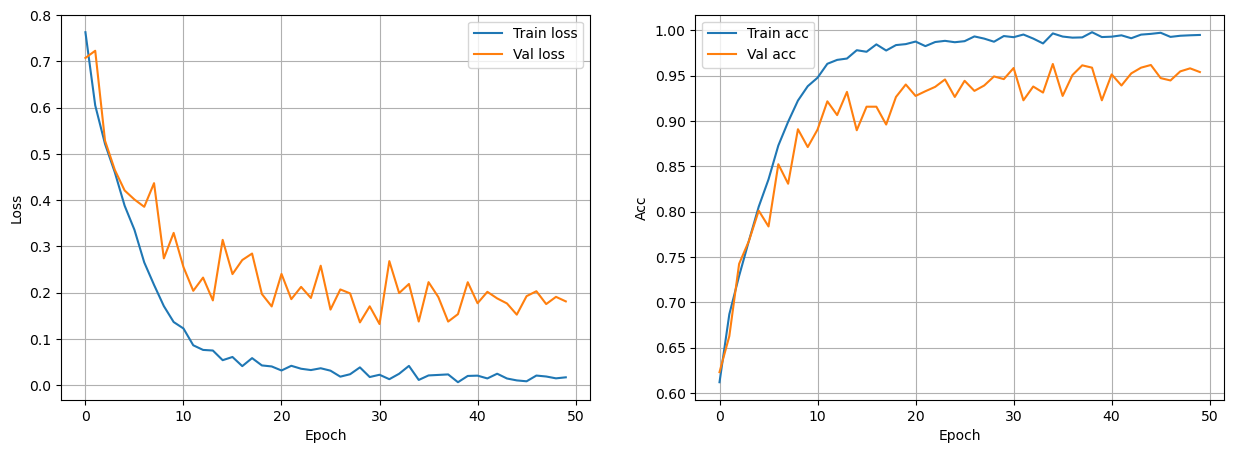

In [27]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(train_loss,label="Train loss")
ax[0].plot(val_loss,label="Val loss")
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].grid()

ax[1].plot(train_acc,label="Train acc")
ax[1].plot(val_acc,label="Val acc")
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Acc")
ax[1].grid()
#plt.savefig('loss_acc.png')

In [42]:
np.savez_compressed('./resnet2', a=train_loss, b=train_acc, c=val_loss, d=val_acc)

In [43]:
torch.save(model.state_dict(), '/storage/home/hpaceice1/ksu48/FML/model2.pth')

In [28]:
model.eval()
with torch.no_grad():
    correct = 0
    totalloss = 0
    pred = torch.tensor(np.zeros(len(testset)))
    for i, (x, y) in enumerate(testloader):
        img=x.to('cuda')
        label=y.to('cuda')
        out = model(img)
        test_loss = loss(model(img), label)
        pred[64*i:(64*i+out.shape[0])] = torch.argmax(out,dim = 1)
        totalloss += test_loss * out.shape[0]
        correct += sum(torch.argmax(out, dim = 1) == label)
    totalloss = totalloss/len(testset)
    print('loss = {:0.4f}'.format(totalloss) )
    print('acc = {:0.4f}'.format(correct/len(testset)) )

loss = 6.4926
acc = 0.3782


In [29]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(testset._labels, pred.numpy()))

0.33212344491146334


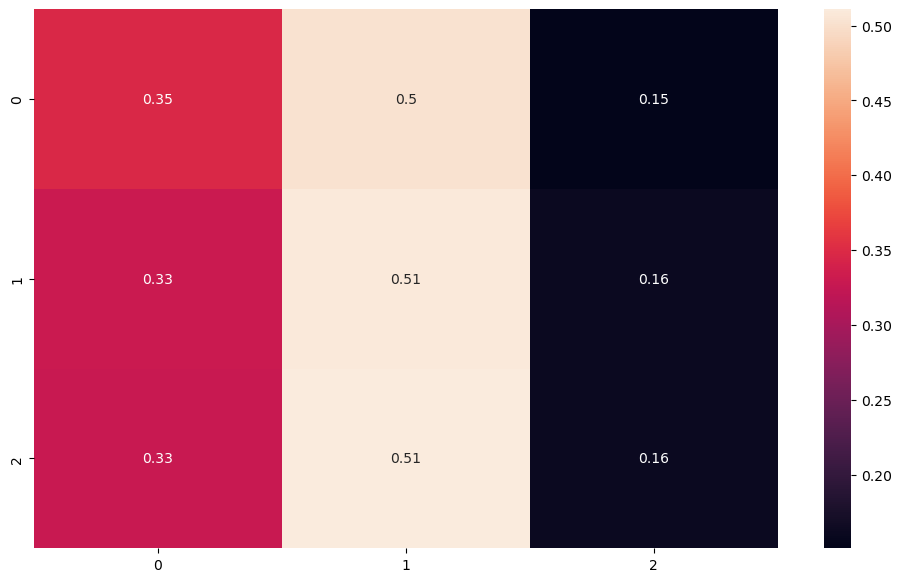

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

# Build confusion matrix
cf_matrix = confusion_matrix(testset._labels, pred.numpy())
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in range(3)],
                     columns = [i for i in range(3)])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('confussion_matrix.png')

In [45]:
loaded = np.load('resnet.npz')

In [8]:
model.load_state_dict(torch.load('/storage/home/hpaceice1/ksu48/FML/model4.pth'))

<All keys matched successfully>